# Dados Ausentes

In [1]:
import pandas as pd
import numpy  as np

In [2]:
s = pd.Series([1,2,3,4,5,6])

In [3]:
s.loc[4] = np.NaN

In [4]:
print(s)

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
5    6.0
dtype: float64


In [5]:
# Create date
time_index = pd.date_range('28/03/2017', periods=5, freq='M')
time_index

DatetimeIndex(['2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
               '2017-07-31'],
              dtype='datetime64[ns]', freq='M')

In [6]:
# Create data frame, set index
df = pd.DataFrame(index=time_index);
print(df)

Empty DataFrame
Columns: []
Index: [2017-03-31 00:00:00, 2017-04-30 00:00:00, 2017-05-31 00:00:00, 2017-06-30 00:00:00, 2017-07-31 00:00:00]


In [7]:
# Create feature with a gap of missing values
df['Sales'] = [1.0,2.0,np.nan,np.nan,5.0];
print(); print(df)


            Sales
2017-03-31    1.0
2017-04-30    2.0
2017-05-31    NaN
2017-06-30    NaN
2017-07-31    5.0


In [8]:
# Interpolate missing values
df1= df.interpolate();
print(); print(df1)


            Sales
2017-03-31    1.0
2017-04-30    2.0
2017-05-31    3.0
2017-06-30    4.0
2017-07-31    5.0


In [9]:
# Forward-fill Missing Values
df2 = df.ffill();
print(); print(df2)


            Sales
2017-03-31    1.0
2017-04-30    2.0
2017-05-31    2.0
2017-06-30    2.0
2017-07-31    5.0


In [10]:
# Backfill Missing Values
df3 = df.bfill();
print(); print(df3)


            Sales
2017-03-31    1.0
2017-04-30    2.0
2017-05-31    5.0
2017-06-30    5.0
2017-07-31    5.0


In [11]:
# Interpolate Missing Values But Only Up One Value
df4 = df.interpolate(limit=1, limit_direction='forward');
print(); print(df4)


            Sales
2017-03-31    1.0
2017-04-30    2.0
2017-05-31    3.0
2017-06-30    NaN
2017-07-31    5.0


In [12]:
# Interpolate Missing Values But Only Up Two Values
df5 = df.interpolate(limit=2, limit_direction='forward');
print(); print(df5)


            Sales
2017-03-31    1.0
2017-04-30    2.0
2017-05-31    3.0
2017-06-30    4.0
2017-07-31    5.0


# Checar o consumo de agua

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import  matplotlib.pyplot  as  plt

In [14]:
waterConsumption_df = pd.read_csv('WaterConsumption.csv')
waterConsumption_df.head()

,Date,reference,target
0,15-01-2010,12.0,12.0
1,15-02-2010,18.0,18.0
2,15-03-2010,22.0,22.0
3,15-04-2010,26.0,26.0
4,15-05-2010,31.0,NaN


In [15]:
# Converting the column to DateTime format
waterConsumption_df.Date = pd.to_datetime(waterConsumption_df.Date, format='%d-%m-%Y')
waterConsumption_df = waterConsumption_df.set_index('Date')
waterConsumption_df.head()

,reference,target
Date,,
2010-01-15,12.0,12.0
2010-02-15,18.0,18.0
2010-03-15,22.0,22.0
2010-04-15,26.0,26.0
2010-05-15,31.0,NaN


In [16]:
# For charting purposes, we will add a column that contains the missing values only.

waterConsumption_df = waterConsumption_df.assign(missing= np.nan)
aux_waterConsumption_df = waterConsumption_df.copy()
waterConsumption_df.missing[waterConsumption_df.target.isna()] = waterConsumption_df.reference
aux_waterConsumption_df = waterConsumption_df.copy()
waterConsumption_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2010-01-15 to 2017-12-15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   reference  96 non-null     float64
 1   target     75 non-null     float64
 2   missing    21 non-null     float64
dtypes: float64(3)
memory usage: 3.0 KB


<AxesSubplot:xlabel='Date'>

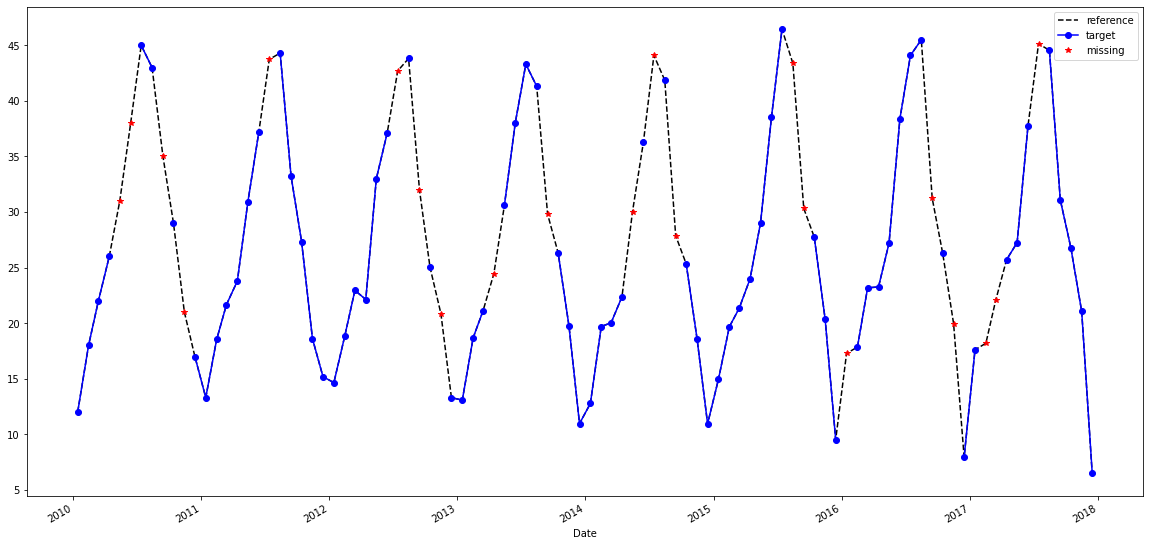

In [17]:
waterConsumption_df.plot(style=['k--', 'bo-', 'r*'],figsize=(20, 10))

### Preenchimento usando media

In [18]:
waterConsumption_df = waterConsumption_df.assign(FillMean=waterConsumption_df.target.fillna(waterConsumption_df.target.mean()))
waterConsumption_df

,reference,target,missing,FillMean
Date,,,,
2010-01-15,12.000000,12.000000,NaN,12.000000
2010-02-15,18.000000,18.000000,NaN,18.000000
2010-03-15,22.000000,22.000000,NaN,22.000000
2010-04-15,26.000000,26.000000,NaN,26.000000
2010-05-15,31.000000,NaN,31.0,25.887473
...,...,...,...,...
2017-08-15,44.550281,44.550281,NaN,44.550281
2017-09-15,31.099088,31.099088,NaN,31.099088
2017-10-15,26.803926,26.803926,NaN,26.803926


<AxesSubplot:xlabel='Date'>

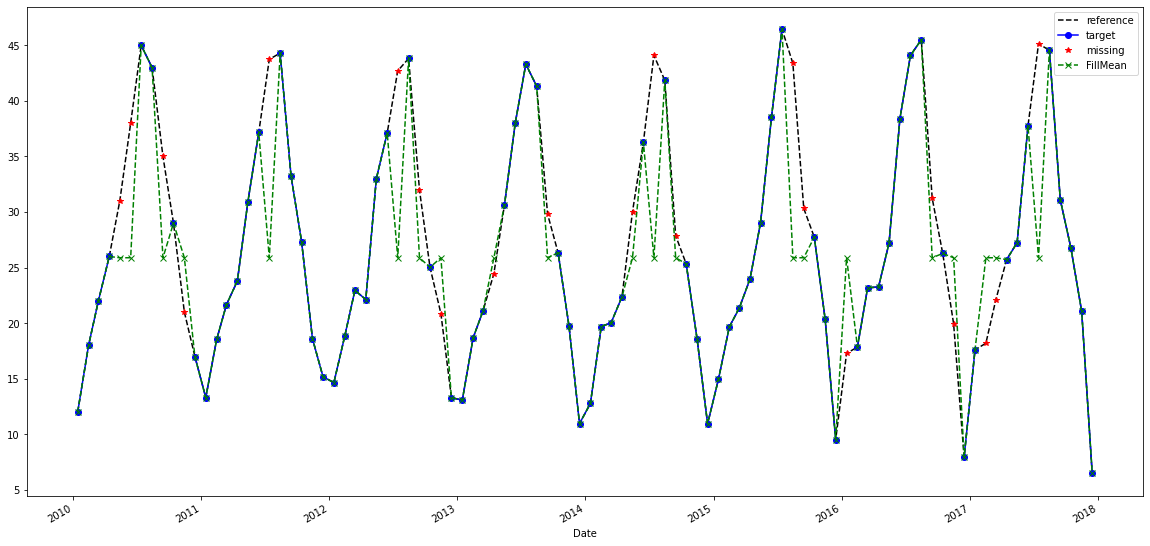

In [19]:
waterConsumption_df.plot(style=['k--', 'bo-', 'r*',  'gx--'],figsize=(20, 10))

In [20]:
waterConsumption_df = aux_waterConsumption_df.copy()
waterConsumption_df

,reference,target,missing
Date,,,
2010-01-15,12.000000,12.000000,NaN
2010-02-15,18.000000,18.000000,NaN
2010-03-15,22.000000,22.000000,NaN
2010-04-15,26.000000,26.000000,NaN
2010-05-15,31.000000,NaN,31.0
...,...,...,...
2017-08-15,44.550281,44.550281,NaN
2017-09-15,31.099088,31.099088,NaN
2017-10-15,26.803926,26.803926,NaN


### Preenchimento usando mediana

In [21]:
waterConsumption_df = aux_waterConsumption_df.copy()

waterConsumption_df = waterConsumption_df.assign(FillMedian=waterConsumption_df.target.fillna(waterConsumption_df.target.median()))
waterConsumption_df 

,reference,target,missing,FillMedian
Date,,,,
2010-01-15,12.000000,12.000000,NaN,12.000000
2010-02-15,18.000000,18.000000,NaN,18.000000
2010-03-15,22.000000,22.000000,NaN,22.000000
2010-04-15,26.000000,26.000000,NaN,26.000000
2010-05-15,31.000000,NaN,31.0,23.787254
...,...,...,...,...
2017-08-15,44.550281,44.550281,NaN,44.550281
2017-09-15,31.099088,31.099088,NaN,31.099088
2017-10-15,26.803926,26.803926,NaN,26.803926


<AxesSubplot:xlabel='Date'>

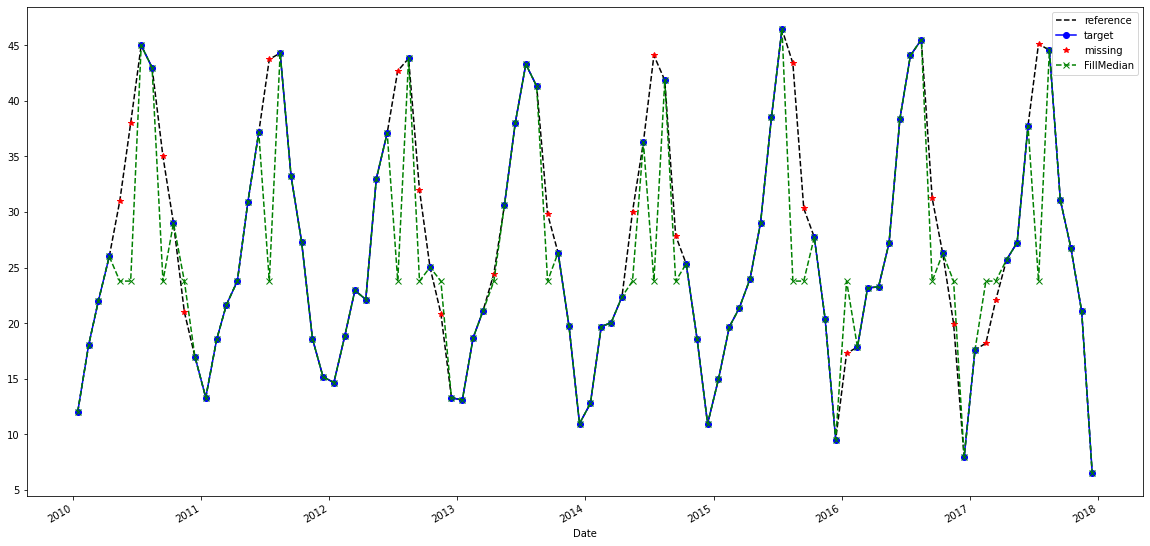

In [22]:
waterConsumption_df.plot(style=['k--', 'bo-', 'r*',  'gx--'],figsize=(20, 10))

### Inserção usando media movel

In [29]:
waterConsumption_df = aux_waterConsumption_df.copy()

waterConsumption_df = waterConsumption_df.assign(RollingMean=waterConsumption_df.target.fillna(waterConsumption_df.target.rolling(3,min_periods=1,).mean()))
waterConsumption_df

,reference,target,missing,RollingMean
Date,,,,
2010-01-15,12.000000,12.000000,NaN,12.000000
2010-02-15,18.000000,18.000000,NaN,18.000000
2010-03-15,22.000000,22.000000,NaN,22.000000
2010-04-15,26.000000,26.000000,NaN,26.000000
2010-05-15,31.000000,NaN,31.0,24.000000
...,...,...,...,...
2017-08-15,44.550281,44.550281,NaN,44.550281
2017-09-15,31.099088,31.099088,NaN,31.099088
2017-10-15,26.803926,26.803926,NaN,26.803926


<AxesSubplot:xlabel='Date'>

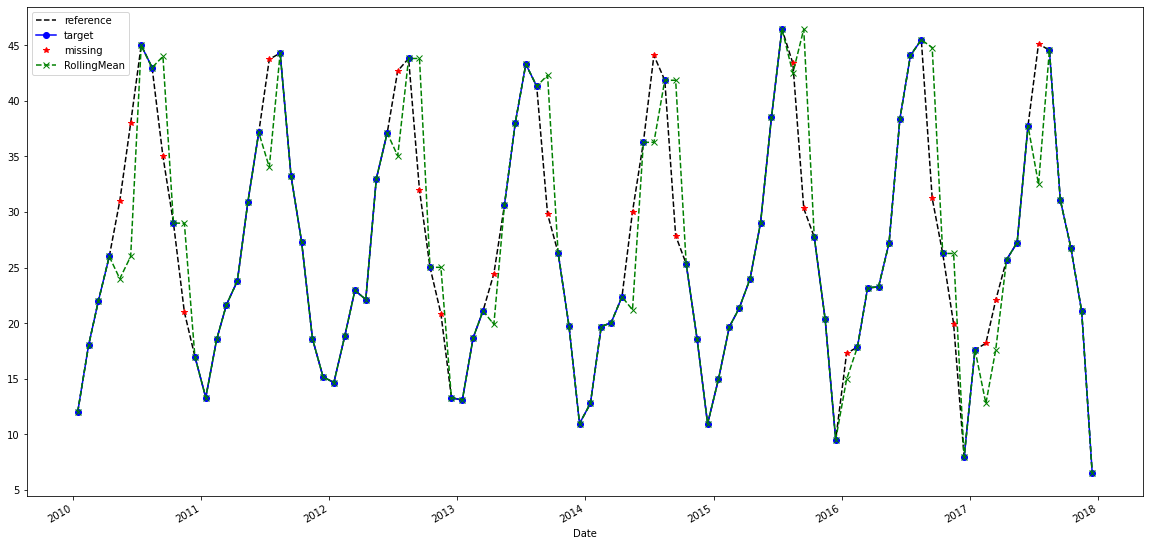

In [30]:
waterConsumption_df.plot(style=['k--', 'bo-', 'r*',  'gx--'],figsize=(20, 10))

### Inserção usando interpolação linear

waterConsumption_df.plot(style=['k--', 'bo-', 'r*',  'gx--'],figsize=(20, 10))

In [31]:
waterConsumption_df = aux_waterConsumption_df.copy()

waterConsumption_df = waterConsumption_df.assign(InterpolateLinear=waterConsumption_df.target.interpolate(method='linear'))
waterConsumption_df

,reference,target,missing,InterpolateLinear
Date,,,,
2010-01-15,12.000000,12.000000,NaN,12.000000
2010-02-15,18.000000,18.000000,NaN,18.000000
2010-03-15,22.000000,22.000000,NaN,22.000000
2010-04-15,26.000000,26.000000,NaN,26.000000
2010-05-15,31.000000,NaN,31.0,32.333333
...,...,...,...,...
2017-08-15,44.550281,44.550281,NaN,44.550281
2017-09-15,31.099088,31.099088,NaN,31.099088
2017-10-15,26.803926,26.803926,NaN,26.803926


<AxesSubplot:xlabel='Date'>

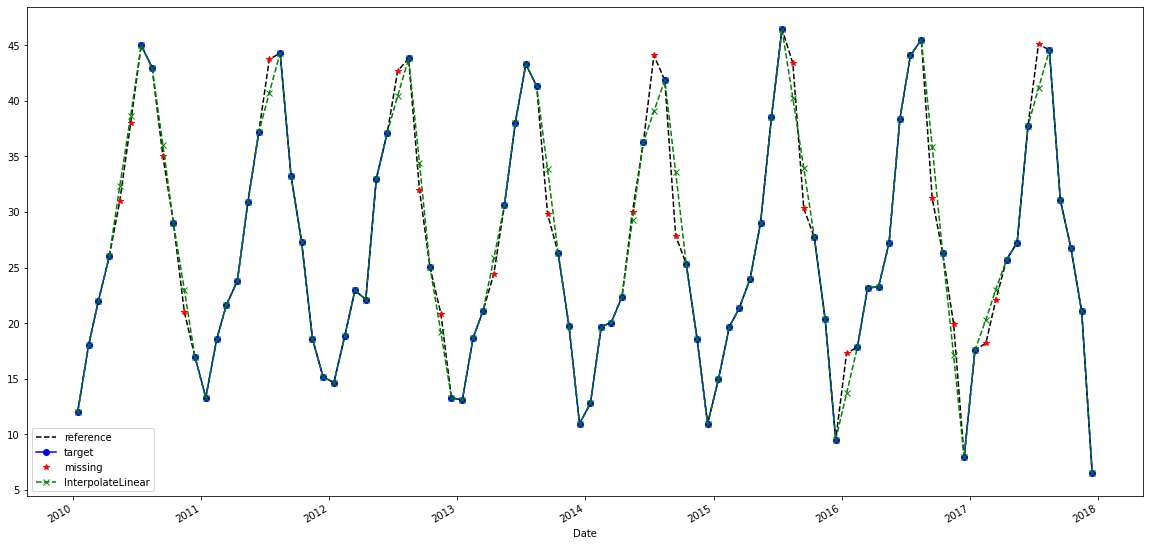

In [32]:
waterConsumption_df.plot(style=['k--', 'bo-', 'r*',  'gx--'],figsize=(20, 10))

### Inserção usando interpolação por tempo

In [33]:
waterConsumption_df = aux_waterConsumption_df.copy()

waterConsumption_df = waterConsumption_df.assign(InterpolateTime=waterConsumption_df.target.interpolate(method='time'))
waterConsumption_df

,reference,target,missing,InterpolateTime
Date,,,,
2010-01-15,12.000000,12.000000,NaN,12.000000
2010-02-15,18.000000,18.000000,NaN,18.000000
2010-03-15,22.000000,22.000000,NaN,22.000000
2010-04-15,26.000000,26.000000,NaN,26.000000
2010-05-15,31.000000,NaN,31.0,32.263736
...,...,...,...,...
2017-08-15,44.550281,44.550281,NaN,44.550281
2017-09-15,31.099088,31.099088,NaN,31.099088
2017-10-15,26.803926,26.803926,NaN,26.803926


<AxesSubplot:xlabel='Date'>

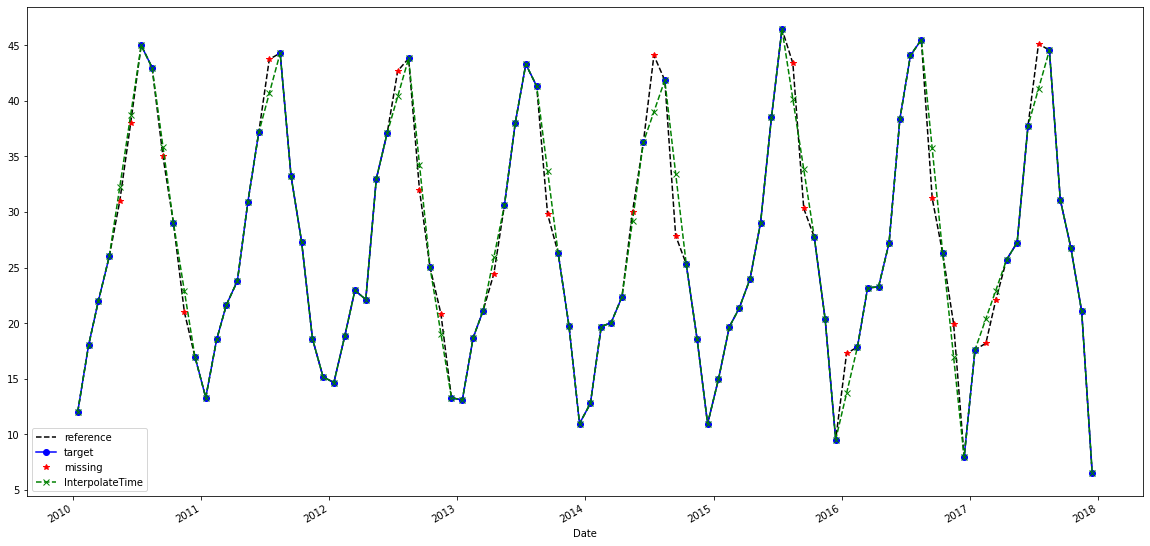

In [34]:
waterConsumption_df.plot(style=['k--', 'bo-', 'r*',  'gx--'],figsize=(20, 10))

### Inserção usando interpolação quadratica

In [35]:
waterConsumption_df = aux_waterConsumption_df.copy()

waterConsumption_df = waterConsumption_df.assign(InterpolateQuadratic=waterConsumption_df.target.interpolate(method='quadratic'))
waterConsumption_df

,reference,target,missing,InterpolateQuadratic
Date,,,,
2010-01-15,12.000000,12.000000,NaN,12.000000
2010-02-15,18.000000,18.000000,NaN,18.000000
2010-03-15,22.000000,22.000000,NaN,22.000000
2010-04-15,26.000000,26.000000,NaN,26.000000
2010-05-15,31.000000,NaN,31.0,32.500323
...,...,...,...,...
2017-08-15,44.550281,44.550281,NaN,44.550281
2017-09-15,31.099088,31.099088,NaN,31.099088
2017-10-15,26.803926,26.803926,NaN,26.803926


<AxesSubplot:xlabel='Date'>

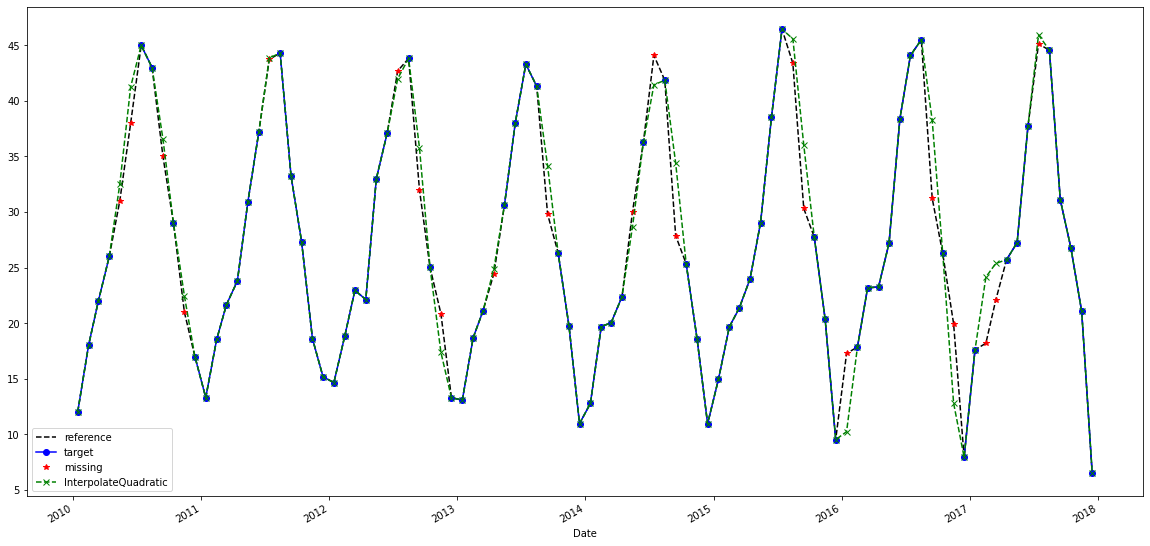

In [36]:
waterConsumption_df.plot(style=['k--', 'bo-', 'r*',  'gx--'],figsize=(20, 10))

### Inserção usando interpolação cubica

In [37]:
waterConsumption_df = aux_waterConsumption_df.copy()

waterConsumption_df = waterConsumption_df.assign(InterpolateCubic=waterConsumption_df.target.interpolate(method='cubic'))
waterConsumption_df

,reference,target,missing,InterpolateCubic
Date,,,,
2010-01-15,12.000000,12.000000,NaN,12.000000
2010-02-15,18.000000,18.000000,NaN,18.000000
2010-03-15,22.000000,22.000000,NaN,22.000000
2010-04-15,26.000000,26.000000,NaN,26.000000
2010-05-15,31.000000,NaN,31.0,32.891644
...,...,...,...,...
2017-08-15,44.550281,44.550281,NaN,44.550281
2017-09-15,31.099088,31.099088,NaN,31.099088
2017-10-15,26.803926,26.803926,NaN,26.803926


<AxesSubplot:xlabel='Date'>

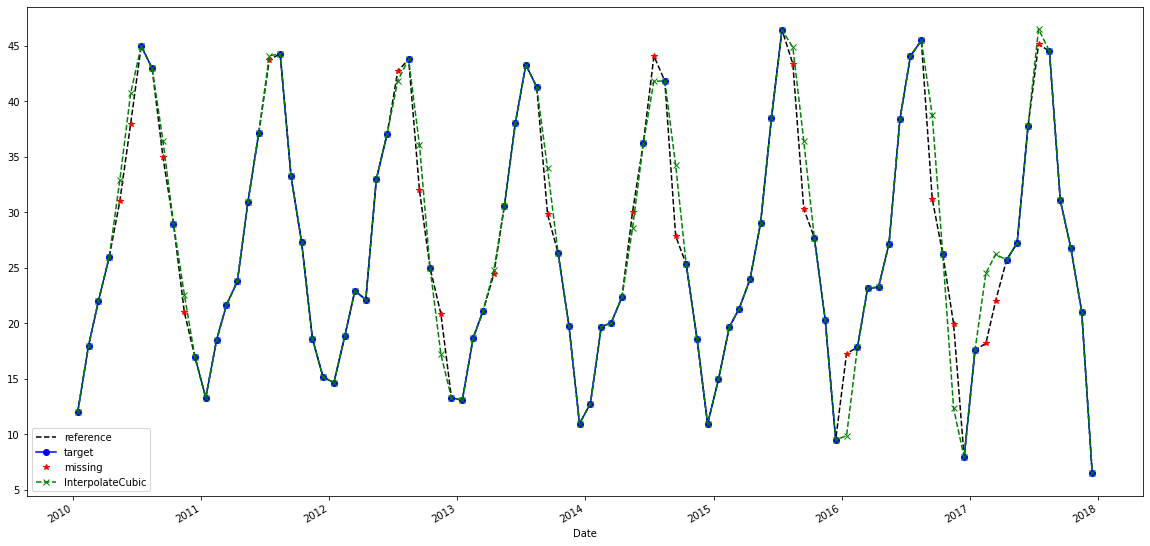

In [38]:
waterConsumption_df.plot(style=['k--', 'bo-', 'r*',  'gx--'],figsize=(20, 10))